In [8]:
%matplotlib inline

In [1]:
import galsim
import matplotlib.pyplot as plt

In [2]:
from bliss.models.psf_decoder import PSFDecoder

# Parametric model

In [36]:
psf_decoder = PSFDecoder(psf_params_file="../../../data/sdss/94/1/12/psField-000094-1-0012.fits",psf_slen=25,sdss_bands=[2])

In [38]:
psf = psf_decoder.psf
psf_image = galsim.Image(psf[0], scale=0.393)
psf_obj = galsim.InterpolatedImage(psf_image).withFlux(1)

In [39]:
psf_obj.calculateFWHM()

1.4236587334017459

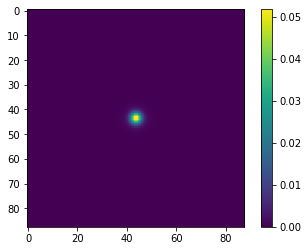

In [40]:
_image = psf_obj.drawImage(nx=88,ny=88, scale=0.393).array
plt.imshow(_image)
plt.colorbar()

## Gaussian

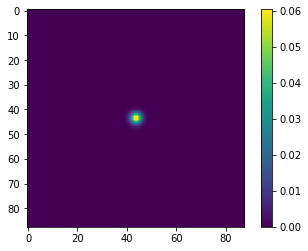

In [41]:
_image = galsim.Gaussian(fwhm=1.4, flux=1.0).withFlux(1.0).drawImage(nx=88,ny=88, scale=0.393).array
plt.imshow(_image)
plt.colorbar()

## PsfDecoder Gauss

1.429639113313107


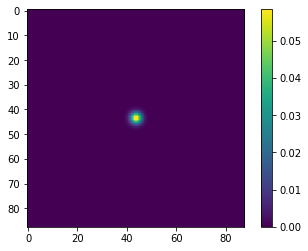

In [5]:
#1.4
psf_decoder = PSFDecoder(psf_slen=53, psf_gauss_fwhm=1.4, pixel_scale=0.393)

psf = psf_decoder.psf
psf_image = galsim.Image(psf[0], scale=0.393)
psf_obj = galsim.InterpolatedImage(psf_image).withFlux(1)

print(psf_obj.calculateFWHM())

_image = psf_obj.drawImage(nx=88,ny=88, scale=0.393).array
plt.imshow(_image)
plt.colorbar()

0.7311599262750867


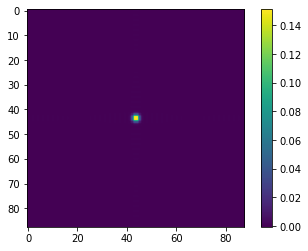

In [4]:
#0.7
psf_decoder = PSFDecoder(psf_slen=53, psf_gauss_fwhm=0.7, pixel_scale=0.393)

psf = psf_decoder.psf
psf_image = galsim.Image(psf[0], scale=0.393)
psf_obj = galsim.InterpolatedImage(psf_image).withFlux(1)

print(psf_obj.calculateFWHM())

_image = psf_obj.drawImage(nx=88,ny=88, scale=0.393).array
plt.imshow(_image)
plt.colorbar()

## From PSF Image

1.4236587334017459


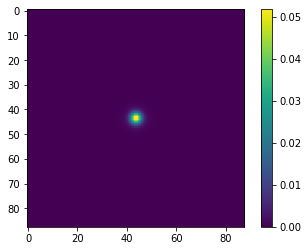

In [10]:
psf_decoder = PSFDecoder(psf_image_file="../../../data/sdss/psField-000094-1-0012-PSF-image.npy",psf_slen=53,sdss_bands=[2])
psf = psf_decoder.psf
psf_image = galsim.Image(psf[0], scale=0.393)
psf_obj = galsim.InterpolatedImage(psf_image).withFlux(1)

print(psf_obj.calculateFWHM())

_image = psf_obj.drawImage(nx=88,ny=88, scale=0.393).array
plt.imshow(_image)
plt.colorbar()

# What about the decoders? 

In [26]:
# load models
from hydra import compose, initialize
from hydra.utils import instantiate

overrides = [
'models.prior.mean_sources=0.1', 
'models.prior.prob_galaxy=0.0', 
'models.decoder.galaxy_model=null',
'models.decoder.psf_slen=25',
'datasets.galsim_blends.prior.galaxy_prob=0',
]

with initialize(config_path="../../sdss_galaxies/config"):
    cfg = compose("config", overrides=overrides)

## image decoder (psf_slen=25)

In [27]:
cfg.models.decoder.psf_slen=25
simds = instantiate(cfg.datasets.simulated)

In [28]:
print(simds.image_prior.mean_sources, simds.image_prior.prob_galaxy)

0.1 0.0


In [29]:
batch = simds.get_batch()
images = batch['images']
star_bools  =batch['star_bools']

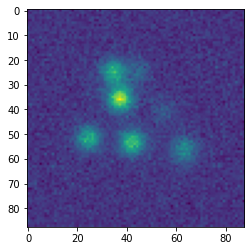

In [30]:
plt.imshow(images[0,0].cpu().numpy())

## image decoder (psf_slen=53)

0.1 0.0


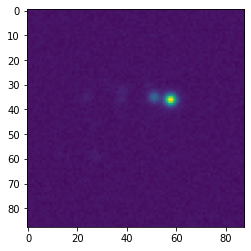

In [31]:
cfg.models.decoder.psf_slen=53
simds = instantiate(cfg.datasets.simulated)

print(simds.image_prior.mean_sources, simds.image_prior.prob_galaxy)

batch = simds.get_batch()
images = batch['images']
star_bools  =batch['star_bools']

plt.imshow(images[0,0].cpu().numpy())

## Full Catalog Decoder

In [45]:
ds_blends = instantiate(cfg.datasets.galsim_blends)

In [46]:
images = ds_blends[0]['images']

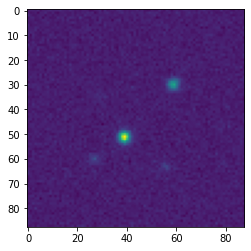

In [47]:
plt.imshow(images.cpu().numpy()[0])